Se realiza un nuevo análisis del sistema pendular, realizando correcciones al metodo Runege - Kutta, en el cual se evidencia o se intuye que al momento de la toma de datos
se han cometido algunos errores, que hacen que al momento de comparar los diferentes metodos de comprobación con respecto a lo arrojado por los datos de trabajo, estos no concuerden de manera adecuada, lo que nos imposibilita determinar de manera adecuada la relación angular de los mismos.

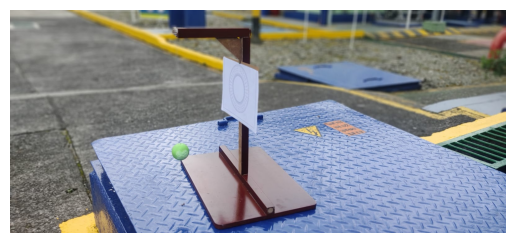

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ruta_imagen = '/content/Imagen_Pendulo.jpg'

imagen = mpimg.imread(ruta_imagen)

plt.imshow(imagen)
plt.axis('off') # Ocultar ejes
plt.show()

In [ ]:
import pandas as pd

ruta_excel = '/content/Datos (3).xlsx'

datos_excel = pd.read_excel(ruta_excel)

print(datos_excel.head())
print(datos_excel.tail())

   t (s)  x (cm)  y (cm)  Angulo (rad)  Angulo (Degrees)
0  0.000  -9.857   1.230      3.017450        172.887146
1  0.034 -12.360   2.074      2.975342        170.474545
2  0.067 -14.250   2.635      2.958746        169.523642
3  0.100 -15.560   3.093      2.945371        168.757355
4  0.133 -16.200   3.316      2.939690        168.431845
      t (s)  x (cm)  y (cm)  Angulo (rad)  Angulo (Degrees)
347  11.555  12.500   2.984      0.234334         13.426369
348  11.589  11.480   2.703      0.231241         13.249143
349  11.622  10.030   2.211      0.216969         12.431391
350  11.655   8.192   1.678      0.202039         11.575998
351  11.689   6.080   1.153      0.187413         10.737956


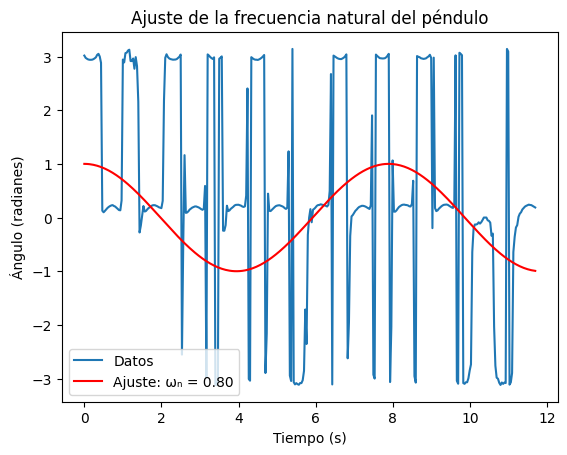

Frecuencia natural del péndulo calculada (ωₙ): 8.085645717360283


In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Longitud de la cuerda en metros
longitud_cuerda = 0.15 # 15 cm convertido a metros

# Aceleración debido a la gravedad en m/s^2
gravedad = 9.80665

# Función para calcular la frecuencia natural del péndulo
def calcular_frecuencia_natural(gravedad, longitud):
    return np.sqrt(gravedad / longitud)

# Función a ajustar
def pendulo_simple(t, omega_n):
     return np.cos(omega_n * t)

# Datos de tiempo y ángulo en radianes desde un DataFrame de Pandas
# Suponiendo que tienes un DataFrame llamado 'datos_excel'

# y las columnas se llaman 't (s)' y 'Angulo (rad)'
# Por ejemplo:
# datos_excel = pd.read_excel('nombre_archivo.xlsx')
t = datos_excel['t (s)'].values
Angulo = datos_excel['Angulo (rad)'].values

# Ajuste de curva
popt, pcov = curve_fit(pendulo_simple, t, Angulo)

# Parámetro ajustado de frecuencia natural del péndulo
omega_n = popt[0]

# Gráfica de los datos y el ajuste
plt.plot(t, Angulo, label='Datos')
plt.plot(t, pendulo_simple(t, omega_n), color='red', label='Ajuste: ωₙ = {:.2f}'.format(omega_n))
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (radianes)')
plt.title('Ajuste de la frecuencia natural del péndulo')
plt.legend()
plt.show()

# Imprimir la frecuencia natural del péndulo calculada
print("Frecuencia natural del péndulo calculada (ωₙ):", calcular_frecuencia_natural(gravedad, longitud_cuerda))

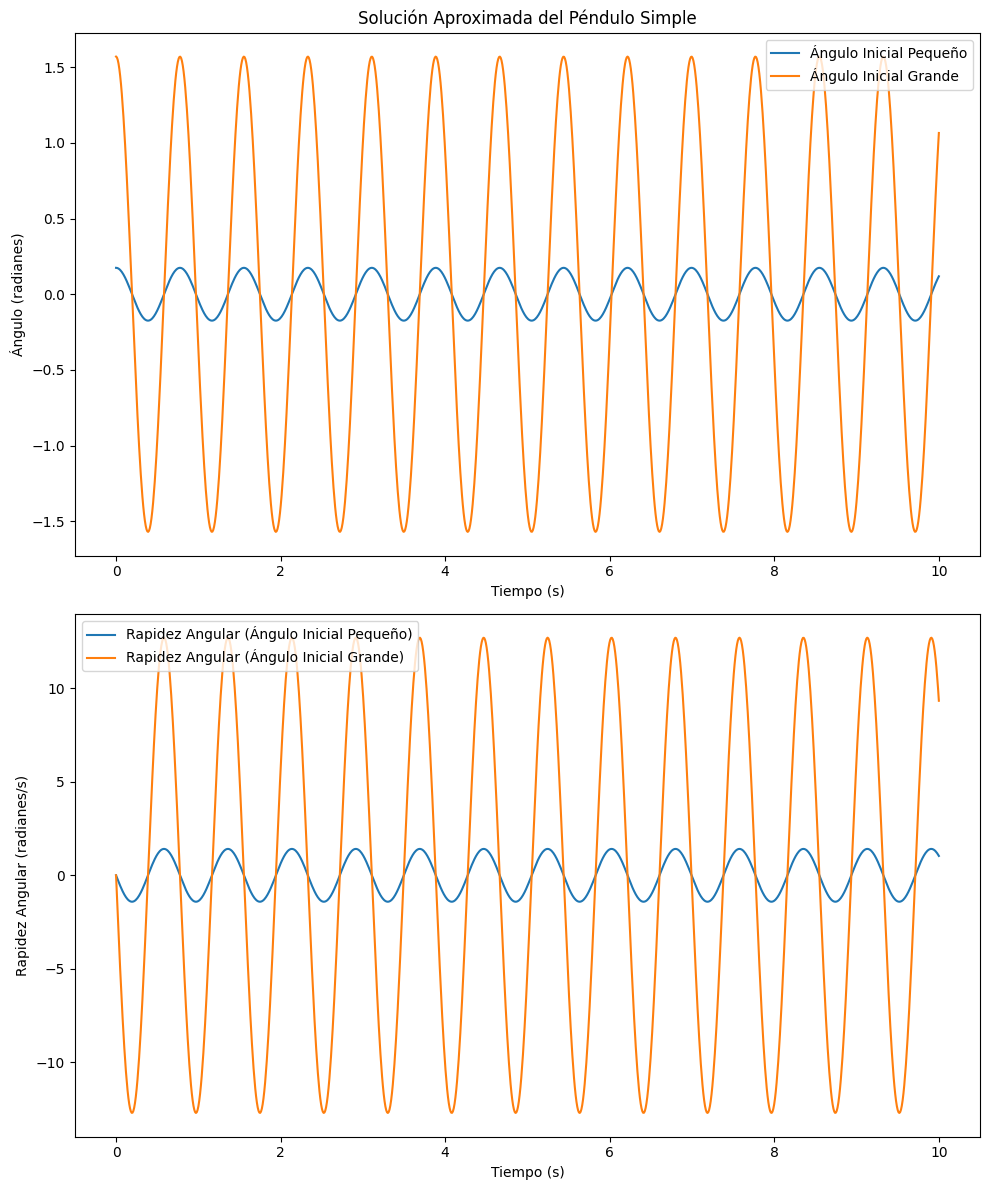

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define la solución aproximada del péndulo simple
def solucion_aproximada(theta_0, omega_n, t):
    return theta_0 * np.cos(omega_n * t)

# Definir el valor de omega_n obtenido en la segunda parte de la labor
omega_n = calcular_frecuencia_natural(gravedad, longitud_cuerda)

# Definir valores iniciales para los ángulos
theta_0_small = np.pi / 18 # Ángulo inicial pequeño
theta_0_large = np.pi / 2  # Ángulo inicial grande

# Definir valores de tiempo
t = np.linspace(0, 10, 1000) # Intervalo de tiempo de 0 a 10 segundos

# Evaluar la solución aproximada para ambos casos
theta_aprox_small = solucion_aproximada(theta_0_small, omega_n, t)
theta_aprox_large = solucion_aproximada(theta_0_large, omega_n, t)

# Calcular la rapidez angular (derivada de theta con respecto al tiempo)
theta_dot_small = -theta_0_small * omega_n * np.sin(omega_n * t)
theta_dot_large = -theta_0_large * omega_n * np.sin(omega_n * t)

# Graficar los resultados
plt.figure(figsize=(10, 12))

# Subplot para el ángulo con ángulo inicial pequeño
plt.subplot(2, 1, 1)
plt.plot(t, theta_aprox_small, label='Ángulo Inicial Pequeño')
plt.plot(t, theta_aprox_large, label='Ángulo Inicial Grande')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (radianes)')
plt.title('Solución Aproximada del Péndulo Simple')
plt.legend()

# Subplot para la rapidez angular
plt.subplot(2, 1, 2)
plt.plot(t, theta_dot_small, label='Rapidez Angular (Ángulo Inicial Pequeño)')
plt.plot(t, theta_dot_large, label='Rapidez Angular (Ángulo Inicial Grande)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Rapidez Angular (radianes/s)')
plt.legend()

plt.tight_layout()
plt.show()

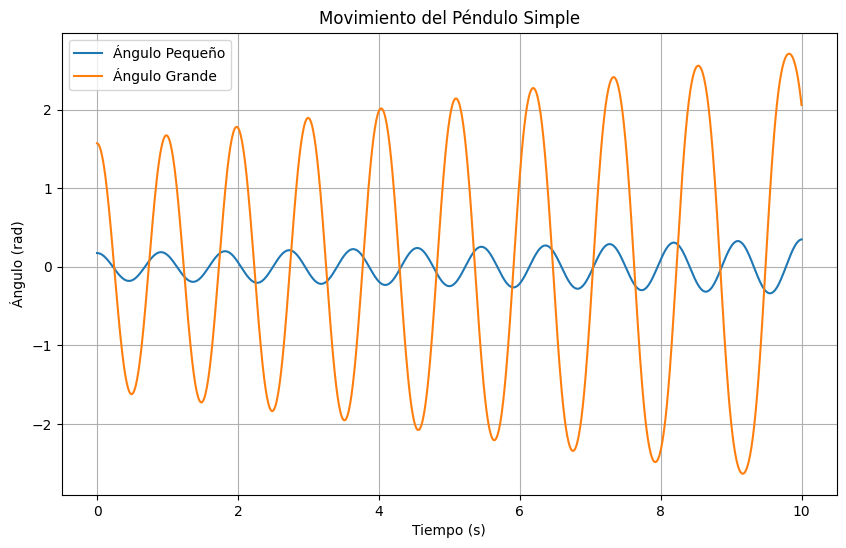

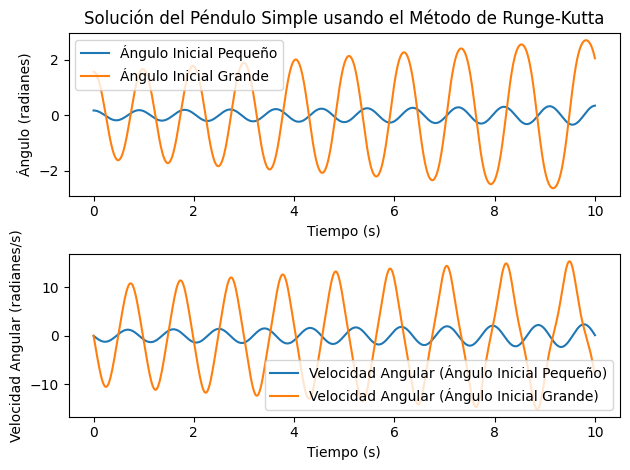

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define la función para calcular la frecuencia natural del péndulo
def calcular_frecuencia_natural(gravedad, longitud):
    return np.sqrt(gravedad / longitud)

# Definir la ecuación diferencial del péndulo
def aceleracion_angular(theta, omega, omega_n):
    return -omega_n**2 * np.sin(theta) - 0.1 * omega #Agregar un término de fricción como ejemplo

def runge_kutta(theta, omega, omega_n, dt):
 # Implementación del método de Runge-Kutta
    k1_theta = omega
    k1_omega = -omega_n**2 * np.sin(theta) - 0.1 * omega

    k2_theta = omega + k1_omega * dt / 2
    k2_omega = -omega_n**2 * np.sin(theta + k1_omega * dt / 2) - 0.1 * (omega + k1_omega * dt / 2)

    k3_theta = omega + k2_omega * dt / 2
    k3_omega = -omega_n**2 * np.sin(theta + k2_omega * dt / 2) - 0.1 * (omega + k2_omega * dt / 2)

    k4_theta = omega + k3_omega * dt
    k4_omega = -omega_n**2 * np.sin(theta + k3_omega * dt) - 0.1 * (omega + k3_omega * dt)

    theta_next = theta + (k1_theta + 2 * k2_theta + 2 * k3_theta + k4_theta) * dt / 6
    omega_next = omega + (k1_omega + 2 * k2_omega + 2 * k3_omega + k4_omega) * dt / 6

    return theta_next, omega_next

# Definir valores iniciales para los ángulos
theta_0_small = np.pi / 18 # Ángulo inicial pequeño
theta_0_large = np.pi / 2  # Ángulo inicial grande

# Definir la longitud de la cuerda y la gravedad
longitud_cuerda = 0.15 # Longitud de la cuerda en metros
gravedad = 9.80665 # Aceleración debido a la gravedad en m/s^2

# Definir el valor de omega_n
omega_n = calcular_frecuencia_natural(gravedad, longitud_cuerda)

# Definir valores de tiempo
t = np.linspace(0, 10, 1000) # Intervalo de tiempo de 0 a 10 segundos
dt = t[1] - t[0] # Paso de tiempo

# Inicializar arreglos para almacenar los ángulos y las velocidades angulares
theta_small = np.zeros_like(t)
omega_small = np.zeros_like(t)
theta_large = np.zeros_like(t)
omega_large = np.zeros_like(t)

# Resolver la ecuación diferencial del péndulo simple usando el método de Runge-Kutta
theta_small[0], omega_small[0] = theta_0_small, 0
theta_large[0], omega_large[0] = theta_0_large, 0

for i in range(1, len(t)):
    theta_small[i], omega_small[i] = runge_kutta(theta_small[i-1], omega_small[i-1], omega_n, dt)
    theta_large[i], omega_large[i] = runge_kutta(theta_large[i-1], omega_large[i-1], omega_n, dt)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(t, theta_small, label="Ángulo Pequeño")
plt.plot(t, theta_large, label="Ángulo Grande")
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (rad)")
plt.title("Movimiento del Péndulo Simple")
plt.legend()
plt.grid(True)
plt.show()

# Subplot para el ángulo con ángulo inicial pequeño
plt.subplot(2, 1, 1)
plt.plot(t, theta_small, label='Ángulo Inicial Pequeño')
plt.plot(t, theta_large, label='Ángulo Inicial Grande')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (radianes)')
plt.title('Solución del Péndulo Simple usando el Método de Runge-Kutta')
plt.legend()

# Subplot para la velocidad angular
plt.subplot(2, 1, 2)
plt.plot(t, omega_small, label='Velocidad Angular (Ángulo Inicial Pequeño)')
plt.plot(t, omega_large, label='Velocidad Angular (Ángulo Inicial Grande)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular (radianes/s)')
plt.legend()

plt.tight_layout()
plt.show()

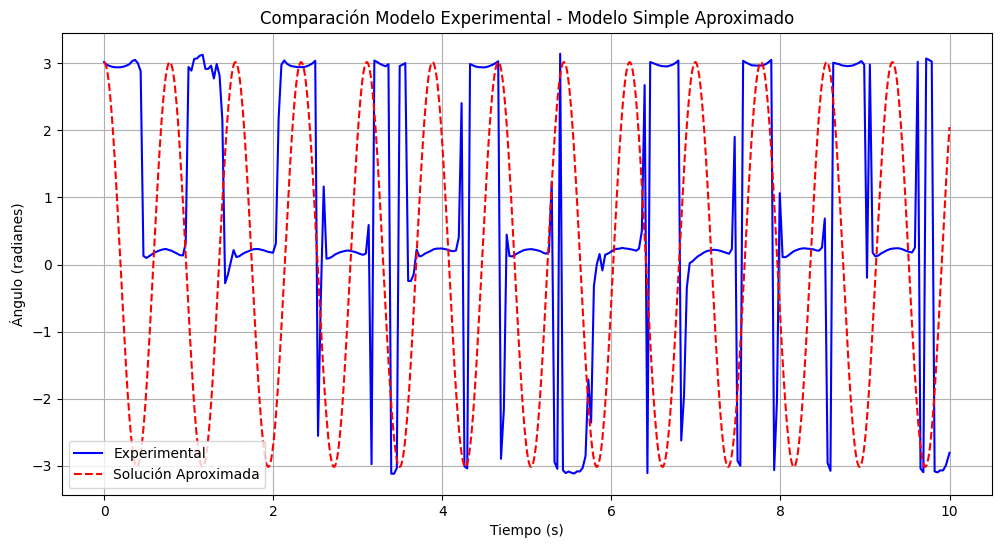

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

# Limitar los datos experimentales hasta el segundo 10
t_exp = datos_excel['t (s)'].values
angulo_exp = datos_excel['Angulo (rad)'].values
indices = t_exp <= 10
t_exp = t_exp[indices]
angulo_exp = angulo_exp[indices]

# Si no hay dato en el segundo 10, agregamos uno interpolando los valores
if t_exp[-1] < 10:
   t_exp = np.append(t_exp, 10)
   f_interp = interp1d(t_exp[:-1], angulo_exp, kind='linear', fill_value='extrapolate')
   angulo_exp = np.append(angulo_exp, f_interp(10))

# Definir la función para calcular la frecuencia natural del péndulo
def calcular_frecuencia_natural(gravedad, longitud):
    return np.sqrt(gravedad / longitud)

# Solución aproximada para el ángulo inicial de los datos experimentales
def solucion_aproximada(theta_0, omega_n, t):
   return theta_0 * np.cos(omega_n * t)

# Definir valores para la longitud de la cuerda y la gravedad
longitud_cuerda = 0.15 # Longitud de la cuerda en metros
gravedad = 9.80665 # Aceleración debido a la gravedad en m/s^2

# Calcular la frecuencia natural del péndulo
omega_n = calcular_frecuencia_natural(gravedad, longitud_cuerda)

# Definir valores de tiempo para la simulación
t_sim = np.linspace(0, 10, 1000) # Intervalo de tiempo de 0 a 10 segundos

# Calcular la solución aproximada para el ángulo inicial de los datos experimentales
theta_0_exp = angulo_exp[0] # Ángulo inicial en los datos experimentales
theta_aprox_exp = solucion_aproximada(theta_0_exp, omega_n, t_sim)

# Gráfico comparativo
plt.figure(figsize=(12, 6))
plt.plot(t_exp, angulo_exp, label='Experimental', color='blue')
plt.plot(t_sim, theta_aprox_exp, label='Solución Aproximada', linestyle='--', color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (radianes)')
plt.title('Comparación Modelo Experimental - Modelo Simple Aproximado')
plt.legend()
plt.grid(True)
plt.show()


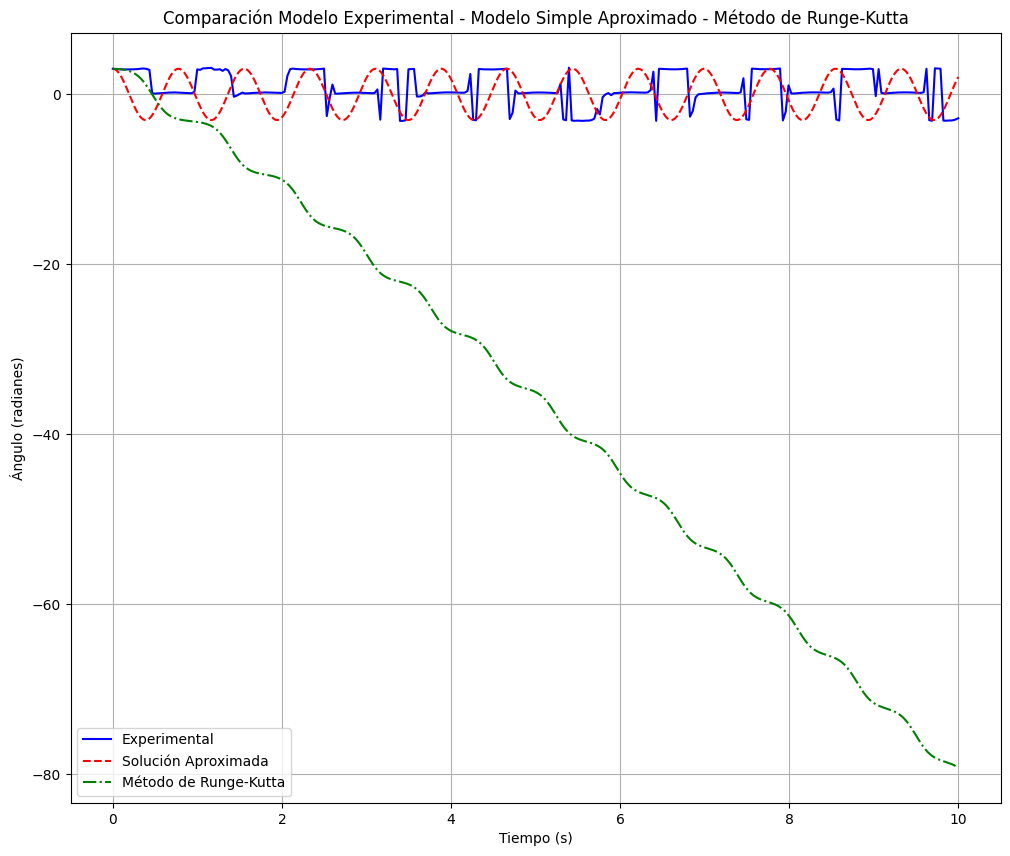

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

# Cargar datos experimentales desde un archivo Excel
datos_excel = pd.read_excel('/content/Datos (3).xlsx')

# Limitar los datos experimentales hasta el segundo 10
t_exp = datos_excel['t (s)'].values
angulo_exp = datos_excel['Angulo (rad)'].values
indices = t_exp <= 10
t_exp = t_exp[indices]
angulo_exp = angulo_exp[indices]

# Si no hay dato en el segundo 10, agregamos uno interpolando los valores
if t_exp[-1] < 10:
   t_exp = np.append(t_exp, 10)
   f_interp = interp1d(t_exp[:-1], angulo_exp, kind='linear', fill_value='extrapolate')
   angulo_exp = np.append(angulo_exp, f_interp(10))

# Definir la función para calcular la frecuencia natural del péndulo
def calcular_frecuencia_natural(gravedad, longitud):
    return np.sqrt(gravedad / longitud)

# Solución aproximada para el ángulo inicial de los datos experimentales
def solucion_aproximada(theta_0, omega_n, t):
    return theta_0 * np.cos(omega_n * t)

# Método de Runge-Kutta para el ángulo inicial de los datos experimentales
def runge_kutta(theta, omega, omega_n, dt):
   # Implementación del método de Runge-Kutta
   k1_theta = omega
   k1_omega = -omega_n**2 * np.sin(theta) - 0.1 * omega

   k2_theta = omega + k1_omega * dt / 2
   k2_omega = -omega_n**2 * np.sin(theta + k1_omega * dt / 2) - 0.1 * (omega + k1_omega * dt / 2)

   k3_theta = omega + k2_omega * dt / 2
   k3_omega = -omega_n**2 * np.sin(theta + k2_omega * dt / 2) - 0.1 * (omega + k2_omega * dt / 2)

   k4_theta = omega + k3_omega * dt
   k4_omega = -omega_n**2 * np.sin(theta + k3_omega * dt) - 0.1 * (omega + k3_omega * dt)

   theta_next = theta + (k1_theta + 2 * k2_theta + 2 * k3_theta + k4_theta) * dt / 6
   omega_next = omega + (k1_omega + 2 * k2_omega + 2 * k3_omega + k4_omega) * dt / 6

   return theta_next, omega_next

# Definir valores para la longitud de la cuerda y la gravedad
longitud_cuerda = 0.15 # Longitud de la cuerda en metros
gravedad = 9.80665 # Aceleración debido a la gravedad en m/s^2

# Calcular la frecuencia natural del péndulo
omega_n = calcular_frecuencia_natural(gravedad, longitud_cuerda)

# Definir valores de tiempo para la simulación
t_sim = np.linspace(0, 10, 1000) # Intervalo de tiempo de 0 a 10 segundos

# Calcular la solución aproximada para el ángulo inicial de los datos experimentales
theta_0_exp = angulo_exp[0] # Ángulo inicial en los datos experimentales
theta_aprox_exp = solucion_aproximada(theta_0_exp, omega_n, t_sim)

# Método de Runge-Kutta para el ángulo inicial de los datos experimentales
dt = t_sim[1] - t_sim[0] # Paso de tiempo
theta_exp_rk = np.zeros_like(t_sim)
omega_exp_rk = np.zeros_like(t_sim)
theta_exp_rk[0], omega_exp_rk[0] = theta_0_exp, 0
for i in range(1, len(t_sim)):
    theta_exp_rk[i], omega_exp_rk[i] = runge_kutta(theta_exp_rk[i-1], omega_exp_rk[i-1], omega_n, dt)

# Gráfico comparativo
plt.figure(figsize=(12, 10))
plt.plot(t_exp, angulo_exp, label='Experimental', color='blue')
plt.plot(t_sim, theta_aprox_exp, label='Solución Aproximada', linestyle='--', color='red')
plt.plot(t_sim, theta_exp_rk, label='Método de Runge-Kutta', linestyle='-.', color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (radianes)')
plt.title('Comparación Modelo Experimental - Modelo Simple Aproximado - Método de Runge-Kutta')
plt.legend()
plt.grid(True)
plt.show()
